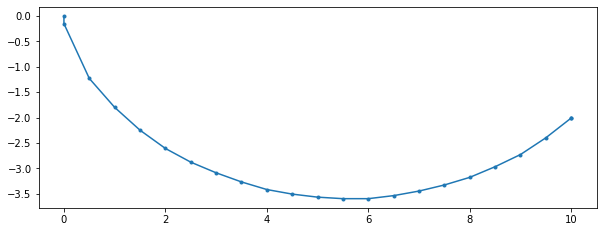

最少需要的时间为 6.163


In [136]:
''' Computing the brachistochrone curve by dynamic programming '''

gravity = 1

def shortest_time_dp(l, h, m, n, print_table = False):
    infty = 1e10
    dl = l/m
    hmax = max(h, l*0.6)
    dh = hmax/n

    # initialize the speed table
    speed = [(2*j*dh*gravity)**0.5 for j in range(n+1)]

    # time table
    # i: horizon index, from 0 to m
    # j: vertical index, from 0 to n 
    table = [[0 for j in range(n+1)] for i in range(m+1)]

    # initialize the first horizontal line
    for i in range(1, m+1):
        table[i][0] = infty

    # initialize the first vertical line
    for j in range(1, n+1):
        table[0][j] = (2*j*dh/gravity)**0.5

    # initialize the backtracking table
    # register the vertical index j at the previous column
    back_table = [[j for j in range(n+1)] for i in range(m+1)]
        
    # main recursion
    for i in range(1, m+1):
        for j in range(n+1):
            t_min = infty
            # loop over the vertical position j_prev of the previous column
            for j_prev in range(n+1):
                # because the velocity has a constant acceleration
                # the distance travelled is exactly equal to
                # the average velocity times the time interval
                # On a perfectly smooth ramp,
                # the speed is a function of only vertical distance 
                av_speed = max(1/infty, (speed[j] + speed[j_prev])*0.5)
                ds = (((j-j_prev)*dh)**2 + dl**2)**0.5
                dt = ds/av_speed
                tj = table[i-1][j_prev] + dt
                if tj < t_min:
                    t_min, back = tj, j_prev

            table[i][j] = t_min
            back_table[i][j] = back

    if print_table:
        # print the tables
        for j in range(n+1):
            for i in range(m+1):
                print("%.2f(%s)" % (table[i][j], j-back_table[i][j]), end="  ")
            print("\n")
            
    # start tracing back the curve of the ramp
    # each element of `ramp` is the coordinates of a point on the curve
    ramp = [(l, -h)] # destination point
    
    # the last segment of the curve is a vertically climbing one
    # we will go through the grid points of the last column
    # to find the grid that gives the minimal total time
    t_min, j_last = infty, n
    for j in range(1, n+1):
        v = 0.5*(speed[j] + (2*gravity*h)**0.5)
        tj = table[m][j] + abs(h - j*dh)/v
        if tj < t_min:
            t_min, j_last = tj, j
    ramp = [(dl*i, -dh*j_last)] + ramp

    j = j_last
    for i in range(m, 0, -1):
        j_prev = back_table[i][j]
        j = j_prev
        ramp = [(dl*(i-1), -dh*j)] + ramp

    # the first segment of the curve is a vertical drop
    # from the origin to the first point of backtracking
    ramp = [(0, 0)] + ramp
    
    return ramp, t_min

def shortest_time(l, h):
    m = 20
    n = m*10
    return shortest_time_dp(l, h, m, n)

ramp, t = shortest_time(10, 2)

import matplotlib.pyplot as plt
ramp_x, ramp_y = list(zip(*ramp))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,aspect='equal')
plt.plot(ramp_x, ramp_y, '.-')
plt.show()

print(f"最少需要的时间为 {t:.{4}}")